In [4]:
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist #MINIST DATABASE 60.000 imagens de treino e 10.000 de teste

In [5]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data() #padrao de importação dos dados

In [6]:
y_treino.shape

(60000,)

In [7]:
from tensorflow.python.keras.utils import np_utils
y_treino_convertido = np_utils.to_categorical(y_treino) #convertendo a coluna de valores em uma matriz de classes #10 colunas
y_teste_convertido = np_utils.to_categorical(y_teste)

In [8]:
y_treino_convertido

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

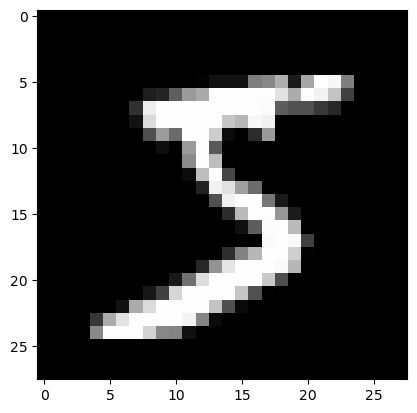

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_treino[0], cmap='gray')

In [10]:
x_treino[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [12]:
x_treino.shape

(60000, 28, 28)

In [13]:
x_treino_remodelado = x_treino.reshape((60000, 784)) #28 x 28
x_teste_remodelado = x_teste.reshape((10000, 784))

In [14]:
x_treino_normalizado = x_treino_remodelado.astype('float32') / 255 #dividir todos paras 255

In [15]:
x_teste_normalizado = x_teste_remodelado.astype('float32') / 255

In [16]:
x_treino_normalizado[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
modelo = Sequential()
modelo.add(Dense(30, input_dim=784, kernel_initializer='normal', activation='relu')) #Entrada & primeira camada oculta
modelo.add(Dense(30, kernel_initializer='normal', activation='relu')) #Segunda camada oculta
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax')) #Saida

In [19]:
from keras.optimizers import SGD
otimizador = SGD()

In [20]:
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc']) #"acc" é a métrica de acurácia
historico = modelo.fit(x_treino_normalizado, y_treino_convertido, epochs=200, batch_size=100, validation_data=(x_teste_normalizado, y_teste_convertido), verbose=1)

Epoch 1/200


600/600 [==============================] - 2s 2ms/step - loss: 2.2871 - acc: 0.2533 - val_loss: 2.2603 - val_acc: 0.4125
Epoch 2/200
600/600 [==============================] - 1s 2ms/step - loss: 2.0889 - acc: 0.3735 - val_loss: 1.7065 - val_acc: 0.5233
Epoch 3/200
600/600 [==============================] - 1s 2ms/step - loss: 1.1696 - acc: 0.6865 - val_loss: 0.7743 - val_acc: 0.7777
Epoch 4/200
600/600 [==============================] - 1s 2ms/step - loss: 0.6581 - acc: 0.8133 - val_loss: 0.5551 - val_acc: 0.8396
Epoch 5/200
600/600 [==============================] - 1s 2ms/step - loss: 0.5218 - acc: 0.8502 - val_loss: 0.4684 - val_acc: 0.8652
Epoch 6/200
600/600 [==============================] - 1s 2ms/step - loss: 0.4566 - acc: 0.8694 - val_loss: 0.4223 - val_acc: 0.8766
Epoch 7/200
600/600 [==============================] - 1s 2ms/step - loss: 0.4173 - acc: 0.8803 - val_loss: 0.3917 - val_acc: 0.8860
Epoch 8/200
600/600 [==============================] - 1s 2ms/step 

Epoch 59/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1214 - acc: 0.9653 - val_loss: 0.1299 - val_acc: 0.9620
Epoch 60/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1198 - acc: 0.9660 - val_loss: 0.1289 - val_acc: 0.9618
Epoch 61/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1184 - acc: 0.9663 - val_loss: 0.1285 - val_acc: 0.9628
Epoch 62/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1169 - acc: 0.9665 - val_loss: 0.1279 - val_acc: 0.9621
Epoch 63/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1154 - acc: 0.9671 - val_loss: 0.1264 - val_acc: 0.9640
Epoch 64/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1141 - acc: 0.9677 - val_loss: 0.1251 - val_acc: 0.9622
Epoch 65/200
600/600 [==============================] - 1s 2ms/step - loss: 0.1127 - acc: 0.9683 - val_loss: 0.1259 - val_acc: 0.9632
Epoch 66/200
600/600 [==============================] - 1s 2ms

Epoch 120/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0670 - acc: 0.9812 - val_loss: 0.1000 - val_acc: 0.9702
Epoch 121/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0663 - acc: 0.9818 - val_loss: 0.1005 - val_acc: 0.9709
Epoch 122/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0659 - acc: 0.9820 - val_loss: 0.1011 - val_acc: 0.9706
Epoch 123/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0653 - acc: 0.9819 - val_loss: 0.1009 - val_acc: 0.9703
Epoch 124/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0648 - acc: 0.9821 - val_loss: 0.0996 - val_acc: 0.9703
Epoch 125/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0642 - acc: 0.9822 - val_loss: 0.1002 - val_acc: 0.9707
Epoch 126/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0638 - acc: 0.9822 - val_loss: 0.0995 - val_acc: 0.9712
Epoch 127/200
600/600 [==============================] 

600/600 [==============================] - 1s 2ms/step - loss: 0.0439 - acc: 0.9885 - val_loss: 0.0989 - val_acc: 0.9714
Epoch 181/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0434 - acc: 0.9886 - val_loss: 0.0989 - val_acc: 0.9716
Epoch 182/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0432 - acc: 0.9888 - val_loss: 0.0979 - val_acc: 0.9721
Epoch 183/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0429 - acc: 0.9888 - val_loss: 0.0989 - val_acc: 0.9721
Epoch 184/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0425 - acc: 0.9888 - val_loss: 0.0983 - val_acc: 0.9726
Epoch 185/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0424 - acc: 0.9892 - val_loss: 0.0993 - val_acc: 0.9719
Epoch 186/200
600/600 [==============================] - 1s 2ms/step - loss: 0.0421 - acc: 0.9888 - val_loss: 0.0982 - val_acc: 0.9721
Epoch 187/200
600/600 [==============================] - 1s 2ms/step 

In [22]:
historico.history[ 'acc' ]

[0.25325000286102295,
 0.3734999895095825,
 0.6865000128746033,
 0.8133166432380676,
 0.8501666784286499,
 0.8694000244140625,
 0.880299985408783,
 0.8880500197410583,
 0.8944500088691711,
 0.8980500102043152,
 0.9018666744232178,
 0.9049333333969116,
 0.9093499779701233,
 0.9120333194732666,
 0.9158666729927063,
 0.9189500212669373,
 0.9216499924659729,
 0.9238666892051697,
 0.9267666935920715,
 0.9291499853134155,
 0.9308666586875916,
 0.9331833124160767,
 0.9349333047866821,
 0.9367166757583618,
 0.9384999871253967,
 0.9402499794960022,
 0.9410833120346069,
 0.9426000118255615,
 0.9437833428382874,
 0.9449499845504761,
 0.945816695690155,
 0.9466666579246521,
 0.9477333426475525,
 0.9484500288963318,
 0.9496833086013794,
 0.9504833221435547,
 0.9515500068664551,
 0.9520333409309387,
 0.952833354473114,
 0.9537500143051147,
 0.9550166726112366,
 0.9552833437919617,
 0.9561833143234253,
 0.9567333459854126,
 0.9578166604042053,
 0.9581999778747559,
 0.9583333134651184,
 0.959633350372

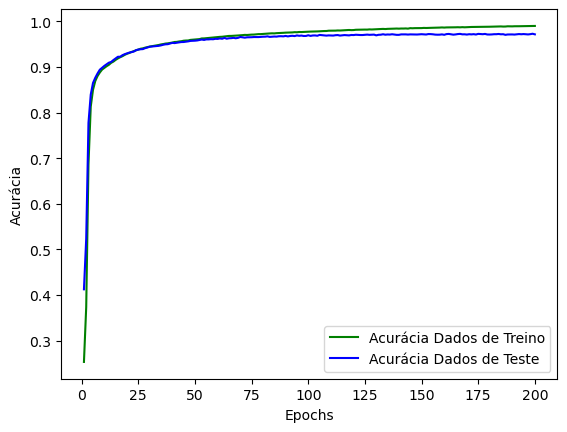

In [23]:
acuracia_treino = historico.history['acc']
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino)+1)

plt.plot(epochs, acuracia_treino, '-g', label='Acurácia Dados de Treino') # g é a cor
plt.plot(epochs, acuracia_teste, '-b', label='Acurácia Dados de Teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()